# Exercise 3.12 in Baumgarte

## Attempt with a mistake in Gleiser

In [6]:
from sympy import *
init_printing(use_unicode=True)

In [7]:
r, M, psi0, psi2, theta = symbols('r, \\cal{M}, \\psi_0, \\psi_2, \\theta')
psi0 = Function(psi0, real=True)
psi2 = Function(psi2, real=True)

In [8]:
P0 = 1

In [52]:
P2 = (3 * cos(theta) ** 2 - 1) / 2

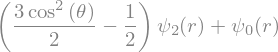

In [10]:
psi = psi0(r) * P0 + psi2(r) * P2
psi

In [15]:
def Del(x):
    return 1 / r ** 2 * Derivative(r ** 2 * Derivative(x, r), r) + \
        1 / (r ** 2 * sin(theta)) * Derivative(sin(theta) * Derivative(x, theta), theta)

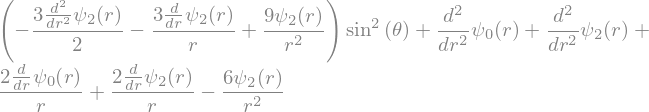

In [29]:
dpsi = Del(psi).simplify().replace(cos(theta) ** 2, 1 - sin(theta) ** 2).expand().collect(sin(theta) ** 2)
dpsi

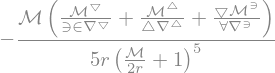

In [31]:
candidate_psi0 = -(1 + M / (2 * r))**(-5) * M / (5 * r) * \
    (5 * (M / (2 * r)) ** 3 + 4 * (M / (2 *r)) ** 4 + (M / (2 * r)) **5)
candidate_psi0

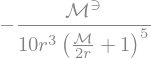

In [37]:
candidate_psi2 = -(1 + M / (2 * r)) ** (-5) * (M / r) ** 3 / 10
candidate_psi2

In [38]:
dpsi_full = dpsi.replace(psi0(r), candidate_psi0) \
    .replace(psi2(r), candidate_psi2).simplify()

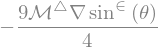

In [39]:
(dpsi_full * (r + M / 2) **7).simplify()

## Attempt with corrected extrinsic curvature

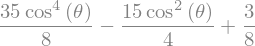

In [51]:
P4 = (35 * cos(theta) ** 4 - 30 * cos(theta) ** 2 + 3) / 8
P4

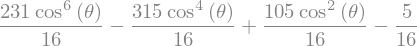

In [55]:
P6 = (231 * cos(theta) ** 6 - 315 * cos(theta) ** 4 + 105 * cos(theta) ** 2 - 5) / 16
P6

In [59]:
tpsi0 = Function(symbols('\\tilde{\\psi}_0'), real=True)
tpsi2 = Function(symbols('\\tilde{\\psi}_2'), real=True)
tpsi4 = Function(symbols('\\tilde{\\psi}_4'), real=True)
tpsi6 = Function(symbols('\\tilde{\\psi}_6'), real=True)

In [68]:
tdel = Del(tpsi0(r) * P0 + tpsi6(r) * P6).simplify()

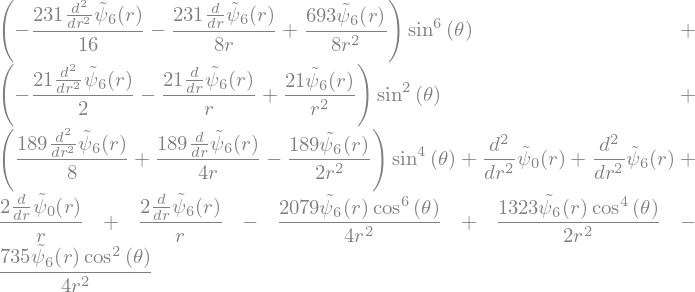

In [70]:
tdel \
    .replace(cos(theta) ** 2, 1 - sin(theta) ** 2) \
    .replace(cos(theta) ** 4, (1 - sin(theta) ** 2) ** 2) \
    .replace(cos(theta) ** 6, (1 - sin(theta) ** 2) ** 3) \
    .expand().collect(sin(theta))

Clearly it would take time to solve this :)

## 3.13